In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [4]:
X

array([[ 8.95031943,  8.45820216],
       [ 8.4838897 ,  9.40473277],
       [ 8.34751739,  7.76754742],
       ...,
       [-3.11874379,  5.54908002],
       [ 9.01180979,  8.06940925],
       [-7.3033004 , -9.28917632]])

In [5]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1,
       2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0,

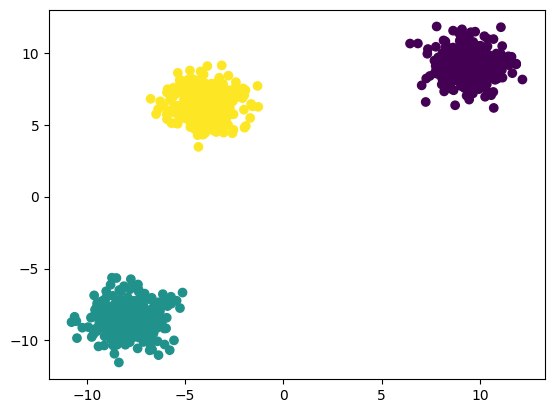

In [6]:
plt.scatter(X[:,0], X[:,1], c=y) 

In [7]:
# standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [12]:
# Elbow method To select K Value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000018,
 401.18974196669996,
 21.718233861056863,
 18.916495134405807,
 16.9227777432206,
 15.366298995834715,
 12.617974233897371,
 11.075115267365828,
 10.680796795710911,
 9.03168613921423]

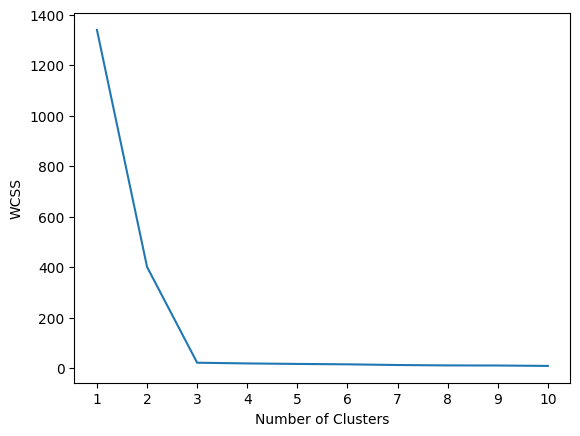

In [15]:
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1,
       1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0,
       0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1,

In [18]:
y_pred = kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2,
       1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0,

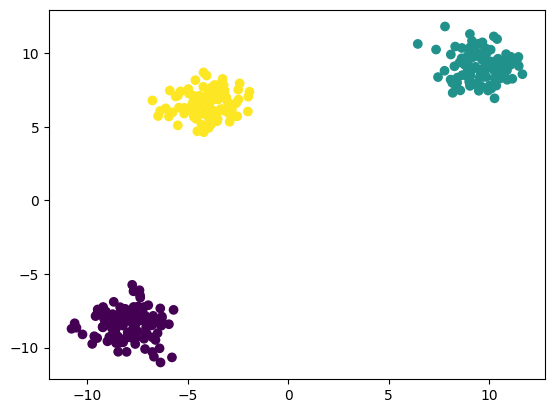

In [20]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

## Validating the k value

### 1. KneeLocator

In [21]:
# kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [24]:
kl.elbow

3

### 2. Silhoutte Ccoring

In [25]:
# silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[0.6883684249049986,
 0.8796695567232437,
 0.6888568857563333,
 0.5212330442434132,
 0.3313182276732502,
 0.5112330312140776,
 0.3300167284113622,
 0.32907924931355603,
 0.33213284143657296]

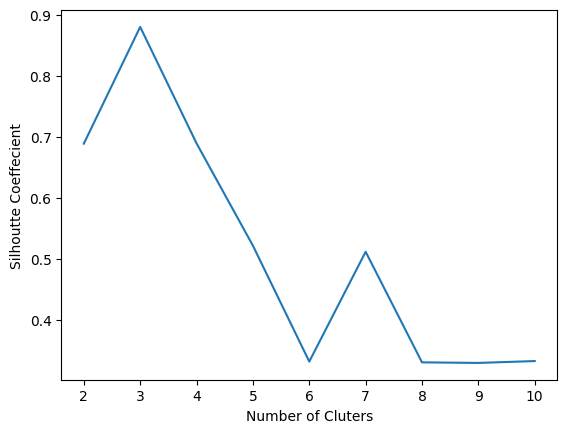

In [28]:
# plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()